# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 2: MINERÍA DE DATOS  
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Grimaldi, Damián - (G-5977/3)
### **Fecha Límite de Entrega:** 21/05/2025  
### **Semestre:** 1° Semestre 2025


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Ejercicio 1. EDA Companias

**VARIABLES**

RyD_Spend -> Gasto en Investigación y Desarrollo (cantidad de dinero invertido)  
Administracion -> Gasto en Administración (cantidad de dinero invertido en funciones administrativas)  
MarketingSpend -> Gasto en Marketing (cantidad de dinero invertido en Marketing)  
Profit -> Ganancias obtenidas ( ganancias netas de la empresa luego de los gastos)  


In [2]:
companias = pd.read_csv('1000_Companies.csv')
companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Podemos observar que no hay nulos
companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
companias.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
# Podemos obser que hay una fila duplicada
companias[companias.duplicated() == True]

,RyD_Spend,Administration,MarketingSpend,State,Profit
755,84533.0,122941.3141,231885.6935,California,121248.7116


In [6]:
# Eliminamos la fila duplicada
companias.drop_duplicates(inplace=True)

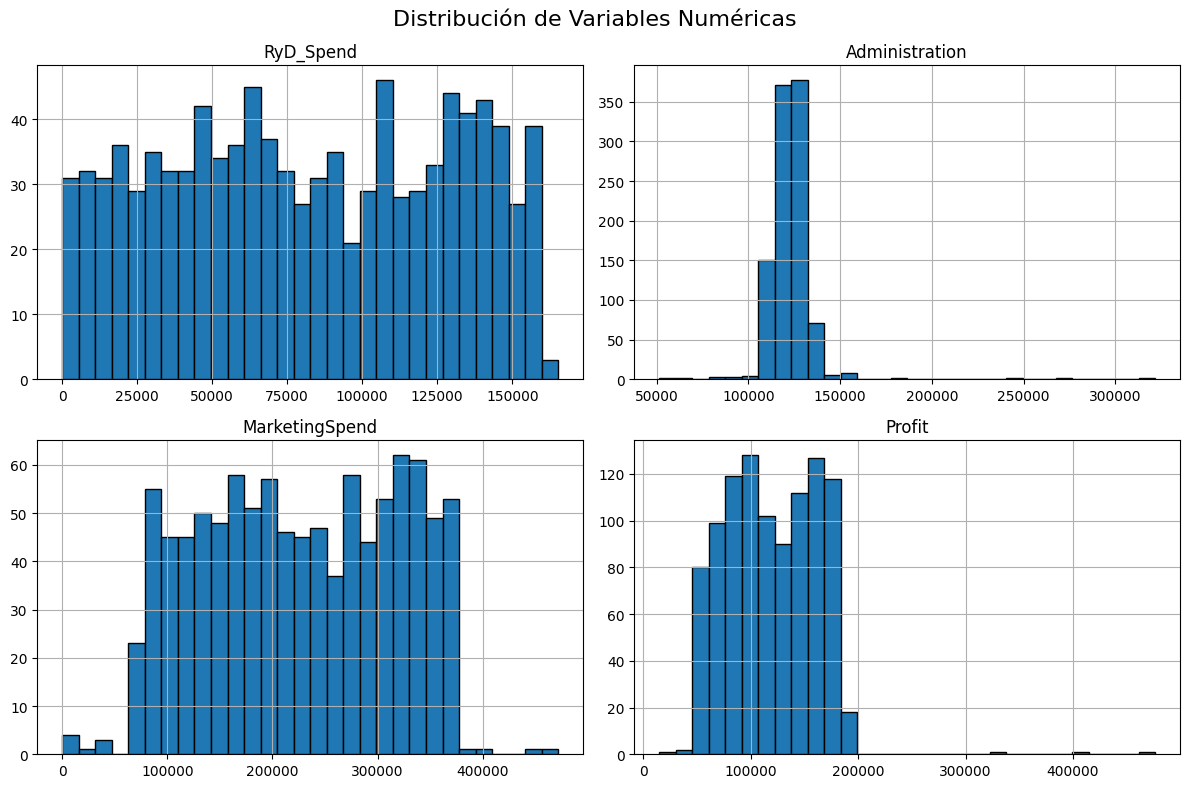

In [7]:
# Histograma de variables numéricas
num_vars = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']
companias[num_vars].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

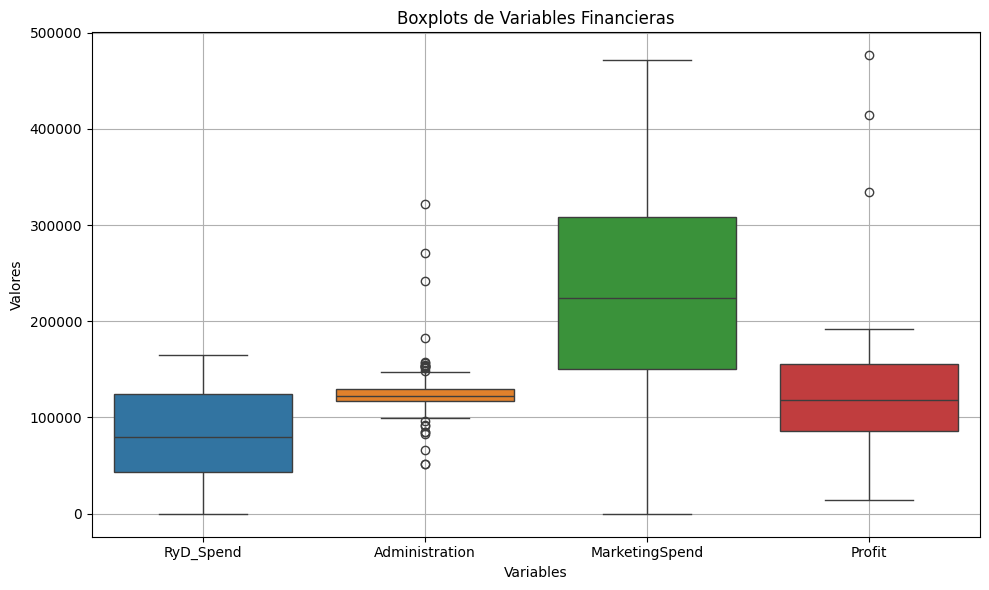

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=companias[num_vars])
plt.title('Boxplots de Variables Financieras')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

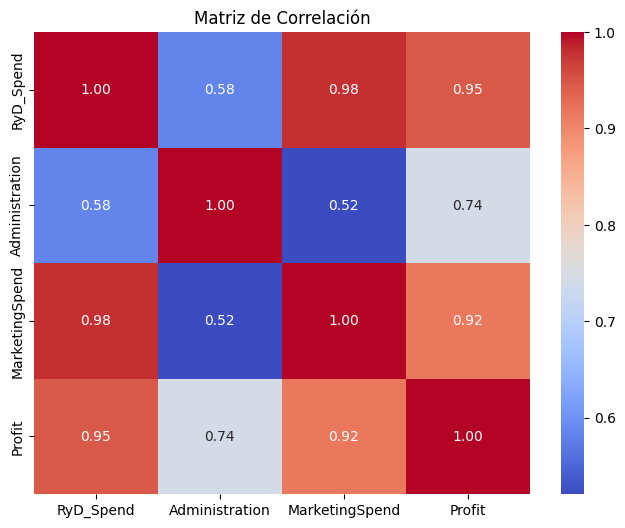

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(companias[num_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


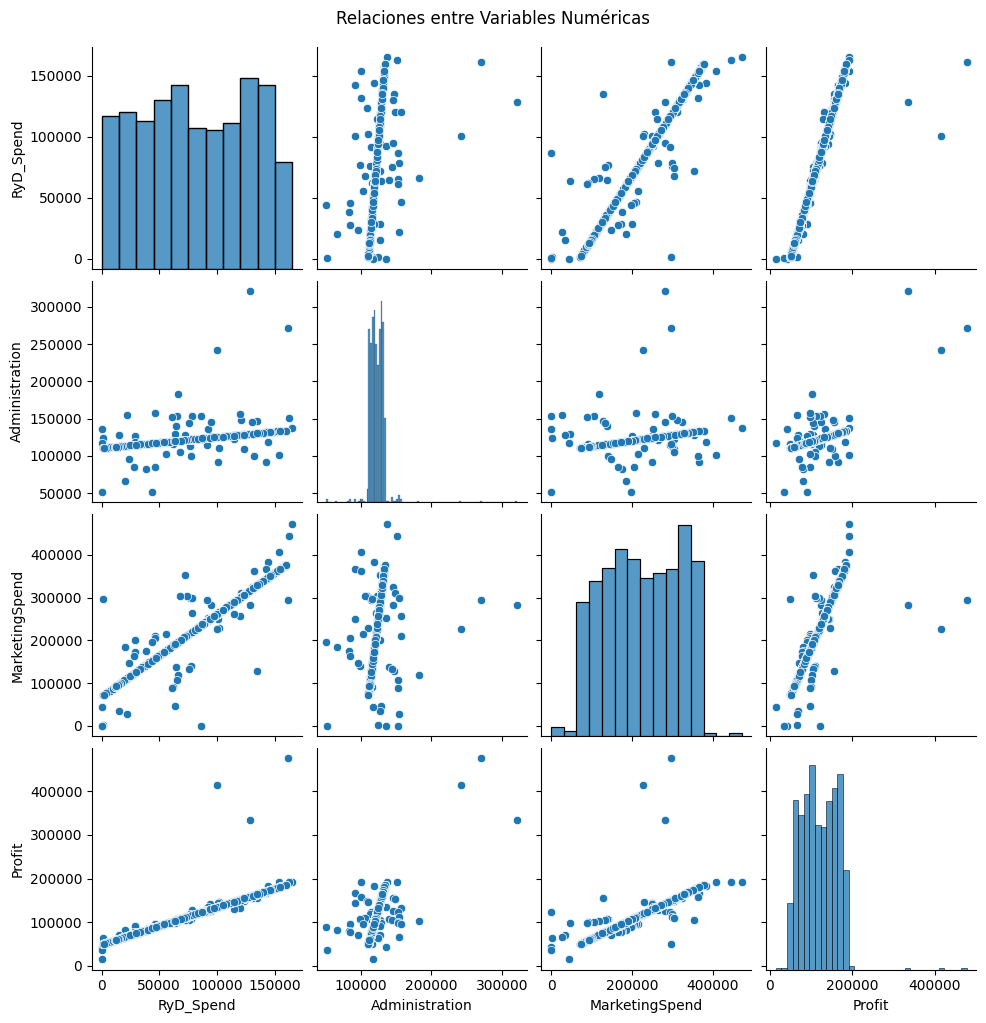

In [10]:
sns.pairplot(companias[num_vars])
plt.suptitle('Relaciones entre Variables Numéricas', y=1.02)
plt.show()

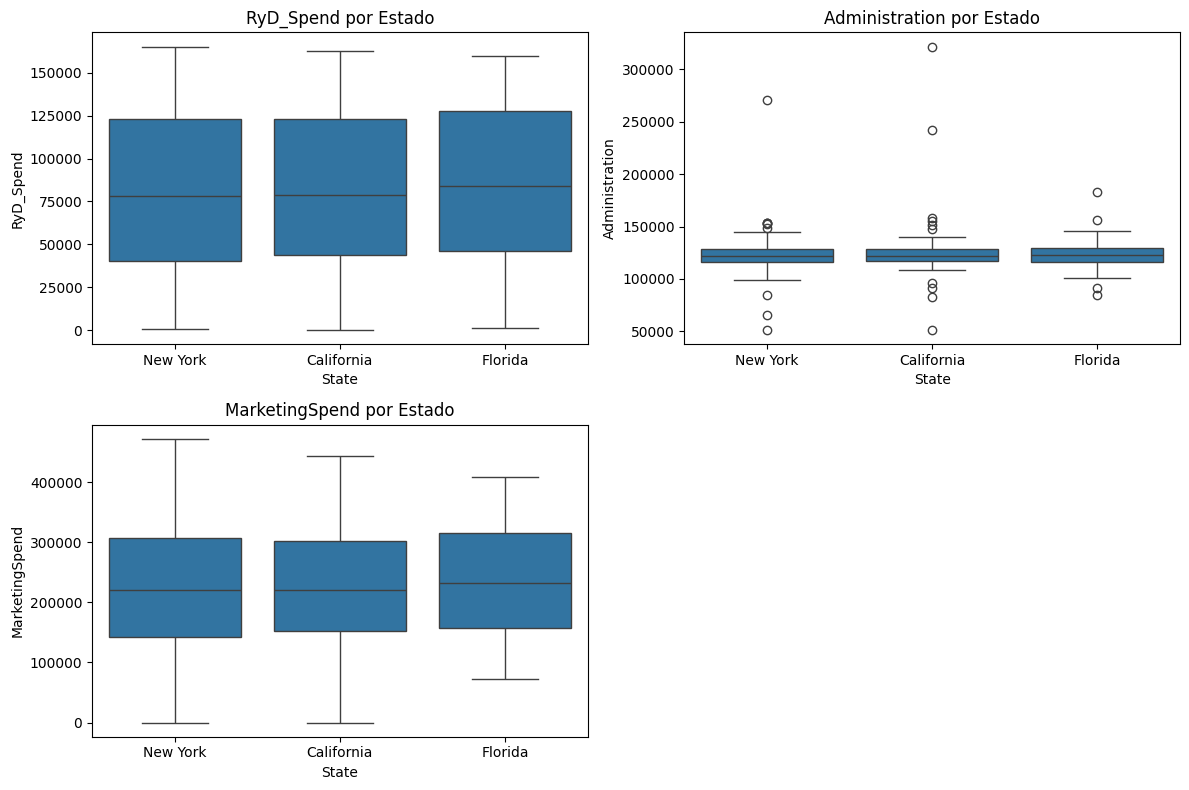

In [11]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars[:-1], 1):  # sin Profit
    plt.subplot(2, 2, i)
    sns.boxplot(x='State', y=var, data=companias)
    plt.title(f'{var} por Estado')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [12]:
companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\grima\AppData\Local\Temp\ipykernel_11876\3155018823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=companias, x='State', palette='Set1')


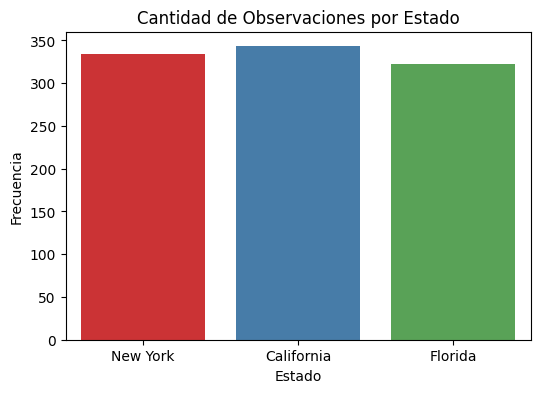

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=companias, x='State', palette='Set1')
plt.title('Cantidad de Observaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.show()


## Particion de los Datos

In [14]:
# Definimos las features relevantes y la variable target
features = [
    'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
]
target = 'Profit'

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas
X_train, X_test, y_train, y_test = train_test_split(companias[features], companias[target], test_size=0.2, random_state=42)

## Codificacion

In [15]:
# Aplicamos get_dummies a ambas particiones, asegurando que tengan las mismas columnas
X_train_codificado = pd.get_dummies(X_train, columns=['State'], drop_first=True)
X_test_codificado = pd.get_dummies(X_test, columns=['State'], drop_first=True)

# Alineamos las columnas para evitar errores en el modelo
X_train_codificado, X_test_codificado = X_train_codificado.align(X_test_codificado, join='left', axis=1, fill_value=0)


## Escalado

In [16]:
# Columnas a escalar
columnas_a_escalar = ['RyD_Spend', 'Administration', 'MarketingSpend']

# Inicializamos el escalador
scaler = StandardScaler()

# Creamos copias para no modificar los originales
X_train_escalado = X_train_codificado.copy()
X_test_escalado = X_test_codificado.copy()

# Ajustamos y transformamos solo las columnas numéricas del entrenamiento
X_train_escalado[columnas_a_escalar] = scaler.fit_transform(X_train_escalado[columnas_a_escalar])

# Usamos el mismo escalador para transformar el test
X_test_escalado[columnas_a_escalar] = scaler.transform(X_test_escalado[columnas_a_escalar])


# Ejercicio 2. Predicción con Arboles de Decisión

# Ejercicio N° 3 EDA Tipos de Droga

**VARIABLES**

Edad -> Edad del paciente ( en años )  
Sexo -> Sexo del paciente (F = Femenino, M = Masculino )  
BP -> Presión sanguínea ( Alto, Normal, bajo )  
Colesterol -> Nivel de colesterol del paciente ( Alto, Normal )  
Na_a_K -> Proporción de sodio en sangre.  

**VARIABLE PREDICTORIA**

Droga -> Tipo de droga o medicamento administrado al paciente.  

In [17]:
drogas = pd.read_csv('drugType.csv')
drogas.head()

,Edad,Sexo,BP,Colesterol,Na_a_K,Droga
0,23,F,Alto,Alto,25.355,DrogaY
1,47,M,Bajo,Alto,13.093,DrogaC
2,47,M,Bajo,Alto,10.114,DrogaC
3,28,F,Normal,Alto,7.798,DrogaX
4,61,F,Bajo,Alto,18.043,DrogaY


In [18]:
# Se puede apreciar que no hay nulos
drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edad        200 non-null    int64  
 1   Sexo        200 non-null    object 
 2   BP          200 non-null    object 
 3   Colesterol  200 non-null    object 
 4   Na_a_K      200 non-null    float64
 5   Droga       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [19]:
# No hay duplicados
drogas[drogas.duplicated() == True].sum()

Edad            0
Sexo            0
BP              0
Colesterol      0
Na_a_K        0.0
Droga           0
dtype: object

In [20]:
drogas.describe()

,Edad,Na_a_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Graficos

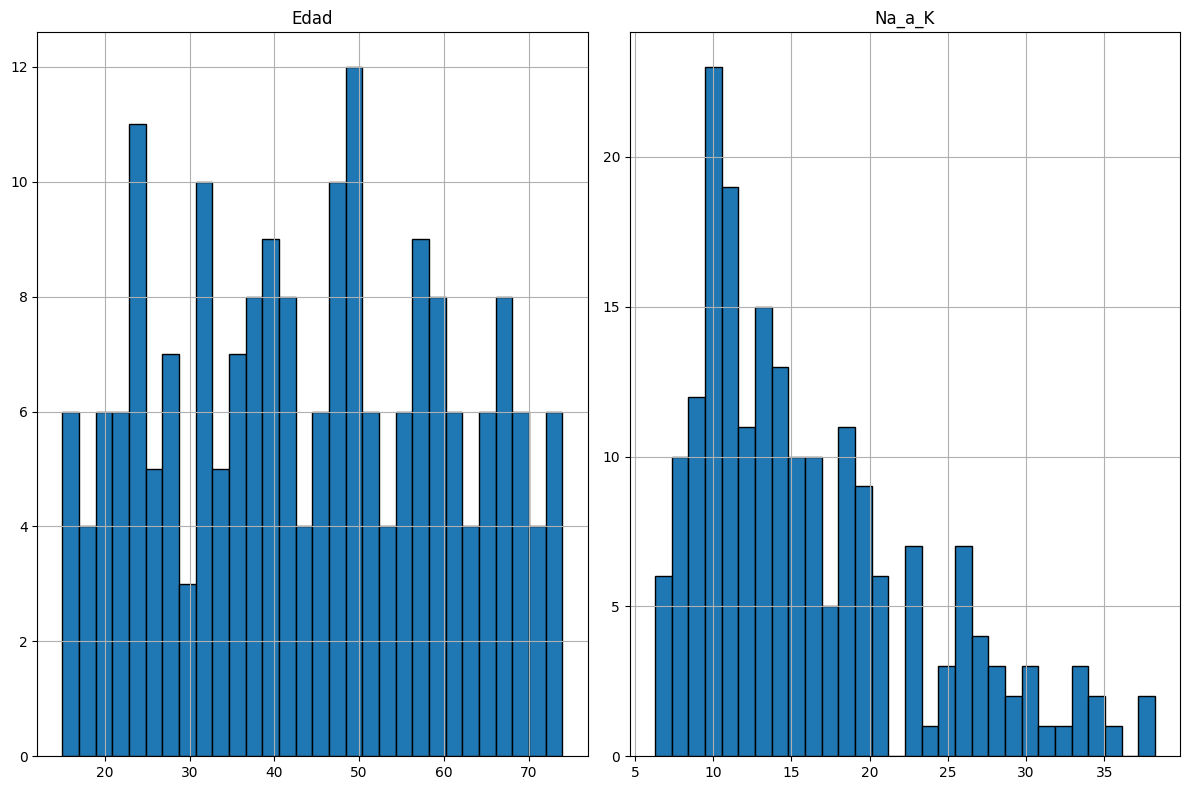

In [21]:
drogas[['Edad','Na_a_K']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

Los niveles de sodio, se puede apreciar que tiene una distibución asimetricca hacia la derecha.
Con respecto a edad, se puede apreciar que tiene una distribución bastante simetrica.

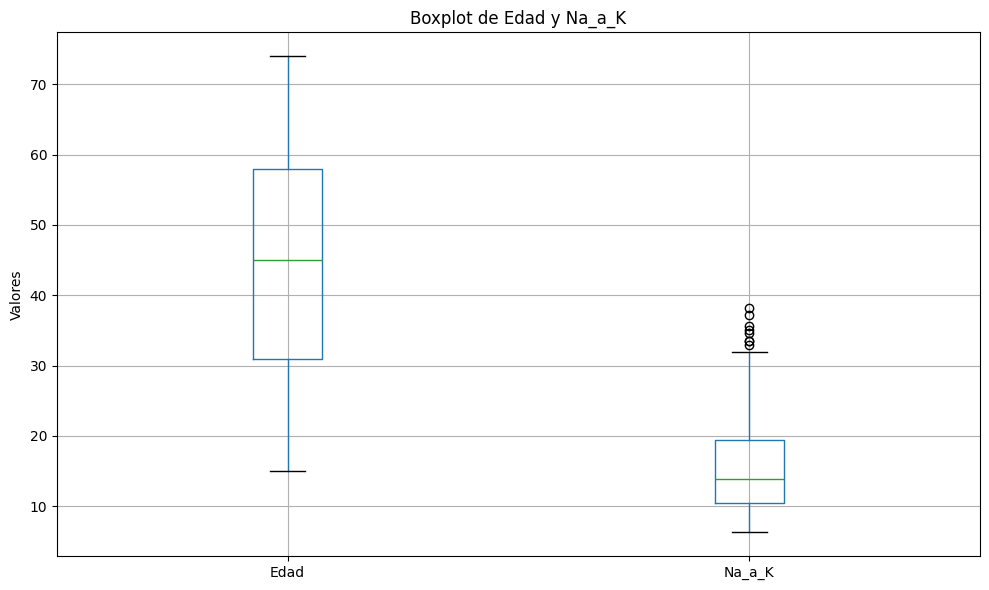

In [22]:
# Se observa que la variable Na_a_K, tiene valores atipicos
plt.figure(figsize=(10, 6)) 
drogas.boxplot()
plt.title('Boxplot de Edad y Na_a_K')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

Con el boxplot, nos confirma hay presencia de outliers para el sodio, aunque, esta se pueda explicarse con alguna otra variable.

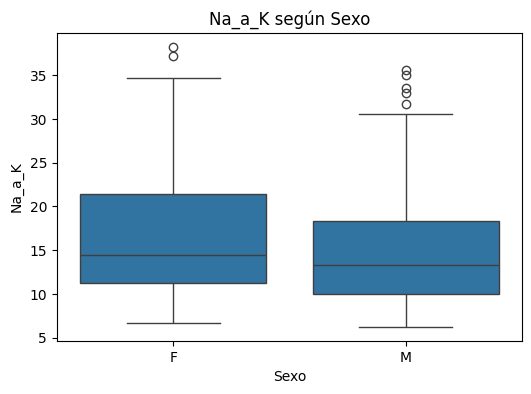

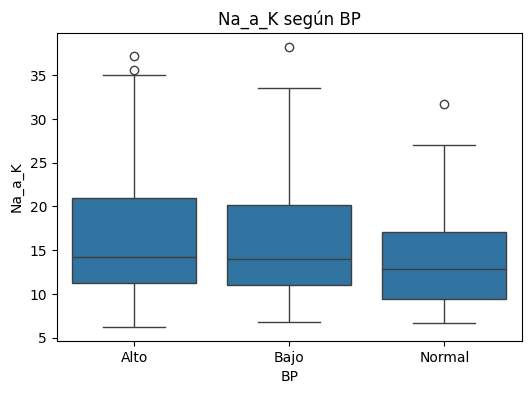

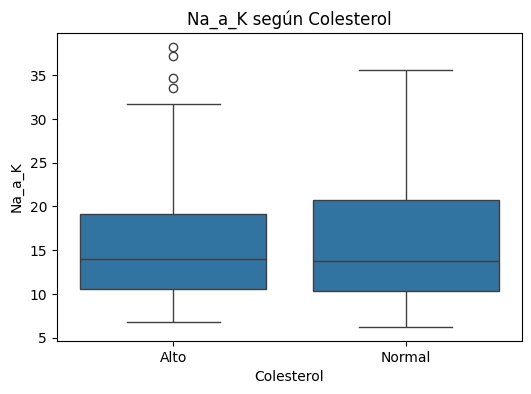

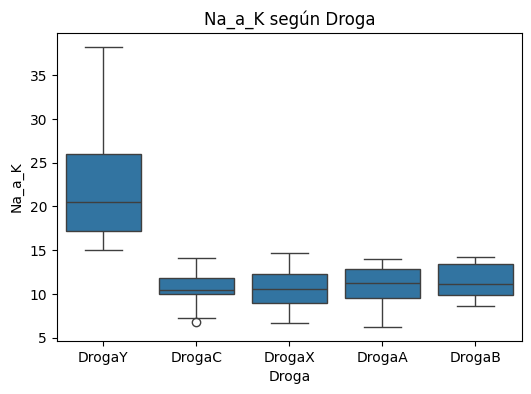

In [23]:
"""
Graficamos la relación entre las variables categóricas y la variable continua Na_a_K
Para ver si hay alguna relación entre las variables categóricas y la variable continua Na_a_K
y se puede llegar a explicar los valores atípicos de dicha variable.
"""
variables_categoricas = drogas.select_dtypes(include='object').columns
for col in variables_categoricas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=drogas, x=col, y='Na_a_K')
    plt.title(f'Na_a_K según {col}')
plt.show()

Se puede observar que Na_a_K, se puede explicar los outliers, con alguna drogra. Por lo que no se van a considerase como outliers dichos valores.

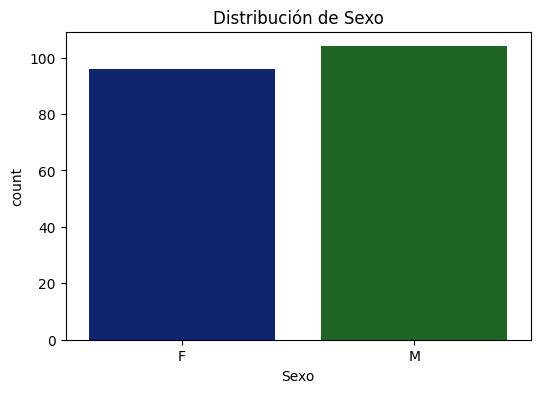

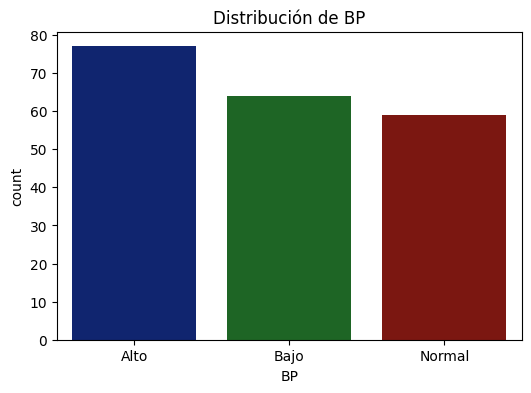

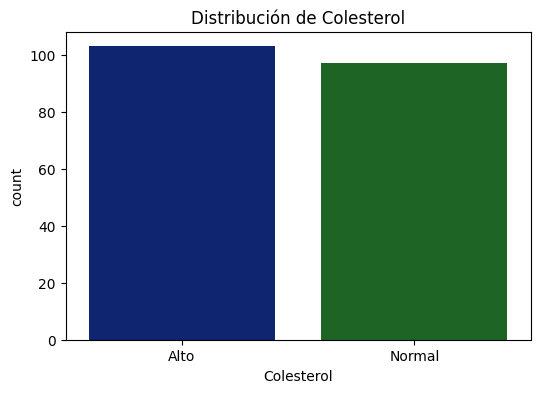

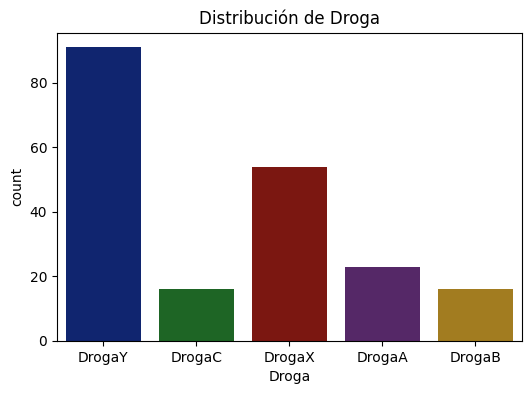

In [24]:
for col in variables_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = col, data=drogas, hue = col, palette='dark6')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
plt.show()

Se puede apreciar que las distribuciones de frecuencia de cada una de las variables categoricas, no se encuentras simetricas, como por ejemplo la variable drogra, que presenta una moda de DrograY.
Luego, con los otros graficos, poseen mas valores alto, y en el caso del sexo, hay mas casos masculinos que femeninos

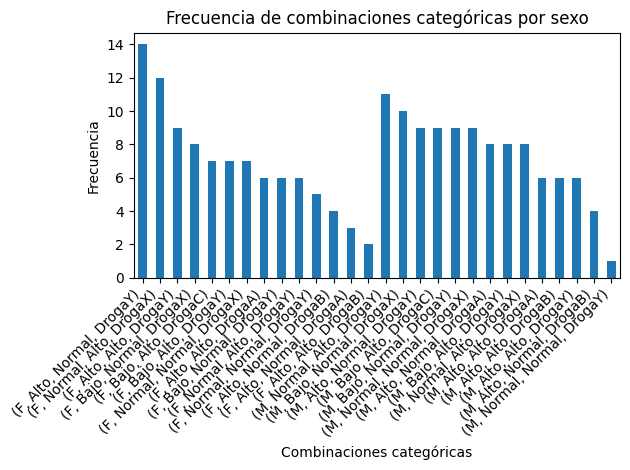

In [25]:
drogas.groupby('Sexo')[variables_categoricas].value_counts().plot(kind='bar')
plt.xlabel('Combinaciones categóricas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.title('Frecuencia de combinaciones categóricas por sexo')
plt.tight_layout()
plt.show()

A partir de este grafico, en el grafico, se puede apreciar que los valores, con el rasgo femenino, tienen una mayores valores que en el caso de los hombres, a pesar de contar con una mayor consentracion de ese genero.

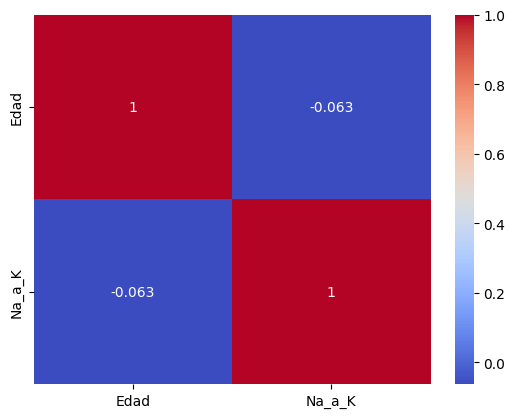

In [26]:
sns.heatmap(drogas.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Codificación

In [27]:
# Codificamos las variables categóricas
# Usamos LabelEncoder para convertir las variables categóricas en numéricas
for col in variables_categoricas:
    drogas[col] = LabelEncoder().fit_transform(drogas[col])

## Division del dataset

In [28]:
# Definimos las features relevantes y la variable target

X = drogas.drop(columns='Droga')
y = drogas['Droga']

# Separamos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Divido en 80% entrenamiento y 20% test
X_train, X_prueba, y_train, y_prueba = train_test_split(X_train, y_train, test_size=0.3, random_state=42) # Divido en 70% entrenamiento y 30% validación

# Ejercicio N° 4 Predicción con Arboles de Decisión

In [29]:
arbol_completo = DecisionTreeClassifier(random_state=42)
arbol_completo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluación de las metricas antes de la poda

In [30]:
y_prueba_pred = arbol_completo.predict(X_prueba)

print("=== Evaluación del árbol completo ===")
print("Exactitud (Accuracy):", accuracy_score(y_prueba, y_prueba_pred))
print("Precisión macro:", precision_score(y_prueba, y_prueba_pred, average='macro'))
print("Exhaustividad (Recall) macro:", recall_score(y_prueba, y_prueba_pred, average='macro'))

=== Evaluación del árbol completo ===
Exactitud (Accuracy): 1.0
Precisión macro: 1.0
Exhaustividad (Recall) macro: 1.0


#### Visualización del árbol

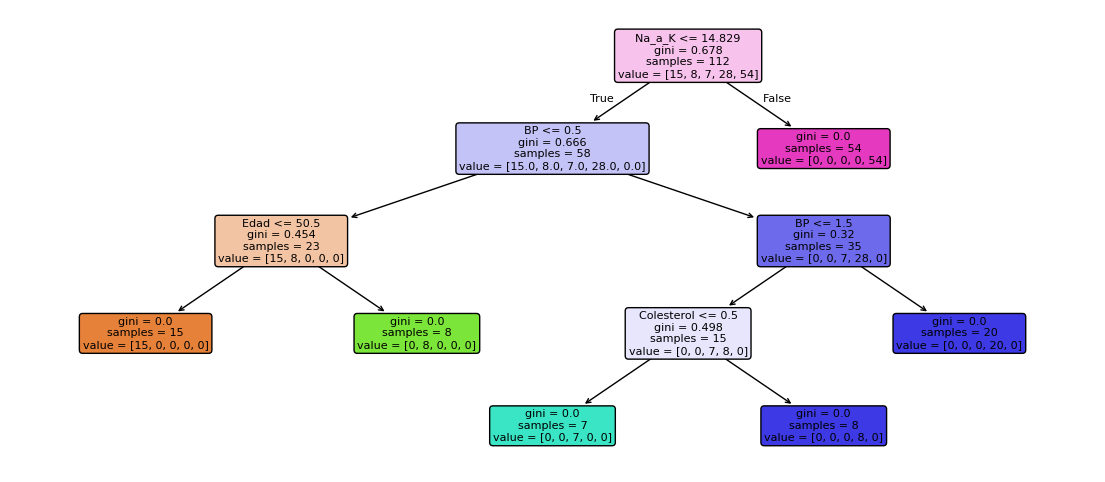

In [31]:
# Obtenemos los nombres de las columnas de las features
features = list(X_prueba.columns)

# Visualización del árbol de decisión completo

plt.figure(figsize=(14,6))
plot_tree(arbol_completo, feature_names=features, fontsize=8, filled=True, rounded=True)
plt.show()

#### Matriz de confución

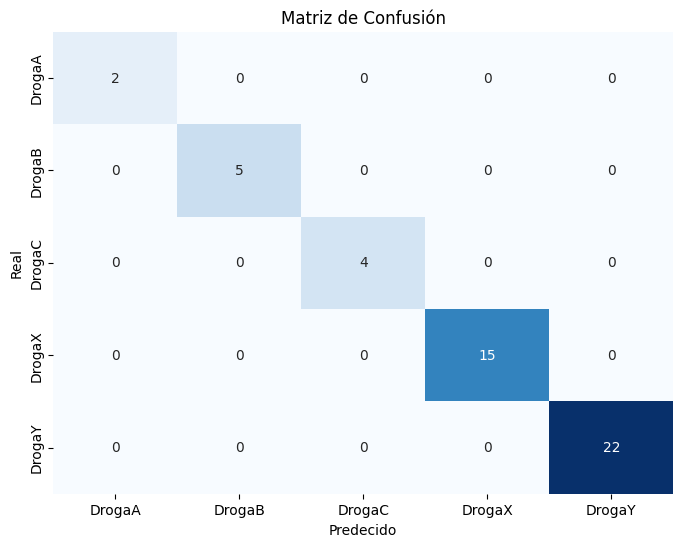

In [32]:
confusion = confusion_matrix(y_prueba, y_prueba_pred)
etiquetas = ['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### Optimización de los parametros

In [33]:
# Creamos una matriz para evaluar cual parametro es el mejor

param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10, None],
    'max_features': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

arbol_podado = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

# Entrenamiento
arbol_podado.fit(X_prueba, y_prueba)

# Mejores hiperparámetros encontrados
best_params = arbol_podado.best_params_
print("Mejores parámetros:", best_params)

mejor_modelo = arbol_podado.best_estimator_
best_prediction = mejor_modelo.predict(X_prueba)

c:\Users\grima\Desktop\UNR\TUIA\4° cuatri\MINERIA DE DATOS\PRACTICA\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros: {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 11, 'max_depth': None, 'criterion': 'gini'}


### Metricas luego de la poda

In [34]:
print("=== Evaluación del árbol podado ===")
print("Exactitud (Accuracy):", accuracy_score(y_prueba, best_prediction))
print("Precisión macro:", precision_score(y_prueba, best_prediction, average='macro'))
print("Exhaustividad (Recall) macro:", recall_score(y_prueba, best_prediction, average='macro'))

=== Evaluación del árbol podado ===
Exactitud (Accuracy): 1.0
Precisión macro: 1.0
Exhaustividad (Recall) macro: 1.0


#### Matriz de confución

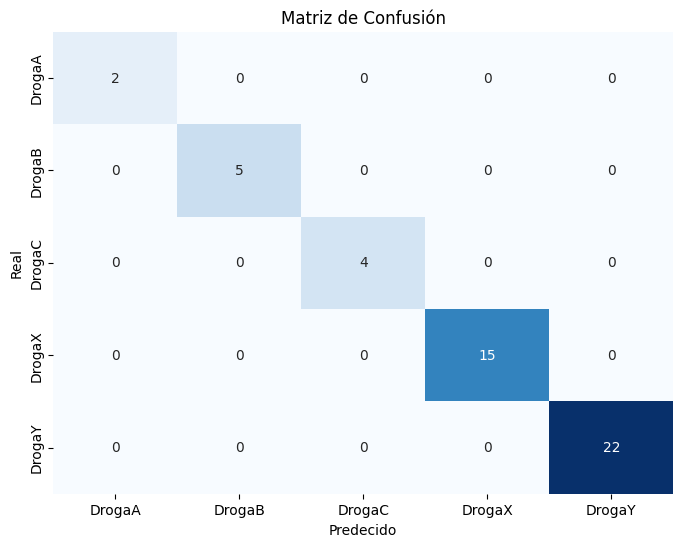

In [35]:
confusion = confusion_matrix(y_prueba, best_prediction)

etiquetas = ['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

#### Visualización del árbol podado

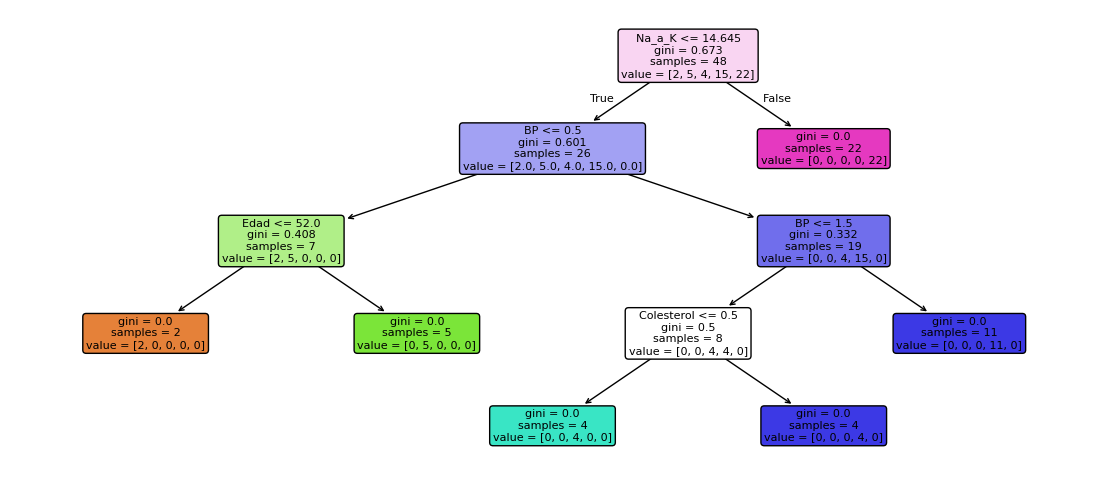

In [36]:
# Obtenemos los nombres de las columnas de las features
features = list(X_prueba.columns)

# Visualización del árbol de decisión completo

plt.figure(figsize=(14,6))
plot_tree(mejor_modelo, feature_names=features, fontsize=8, filled=True, rounded=True)
plt.show()